In [207]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [208]:
# Storing the csv data into "info" variable

info = pd.read_csv("archive\data1ln.csv", low_memory=False)

In [209]:
info.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [210]:
# Checking Back data

info.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [211]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [212]:
# Renaming column names as dataset have incorrect names

info.columns = ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

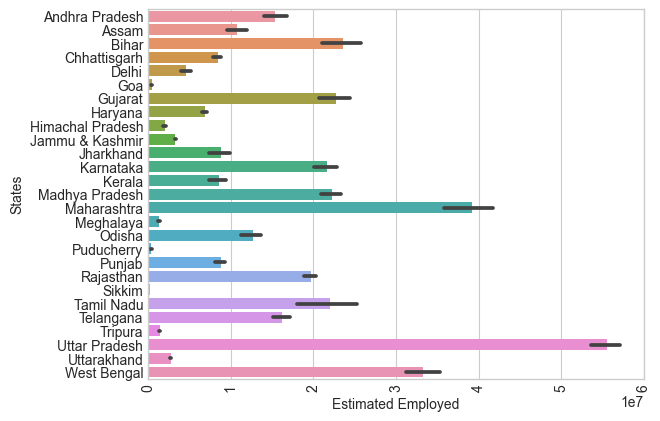

In [228]:
# Estimated Employed vs States

# sns.heatmap(info.isnull(), cbar=False)
sns.barplot(x= info['Estimated Employed'],y= info['States'])
plt.xticks(rotation='vertical')
plt.show()

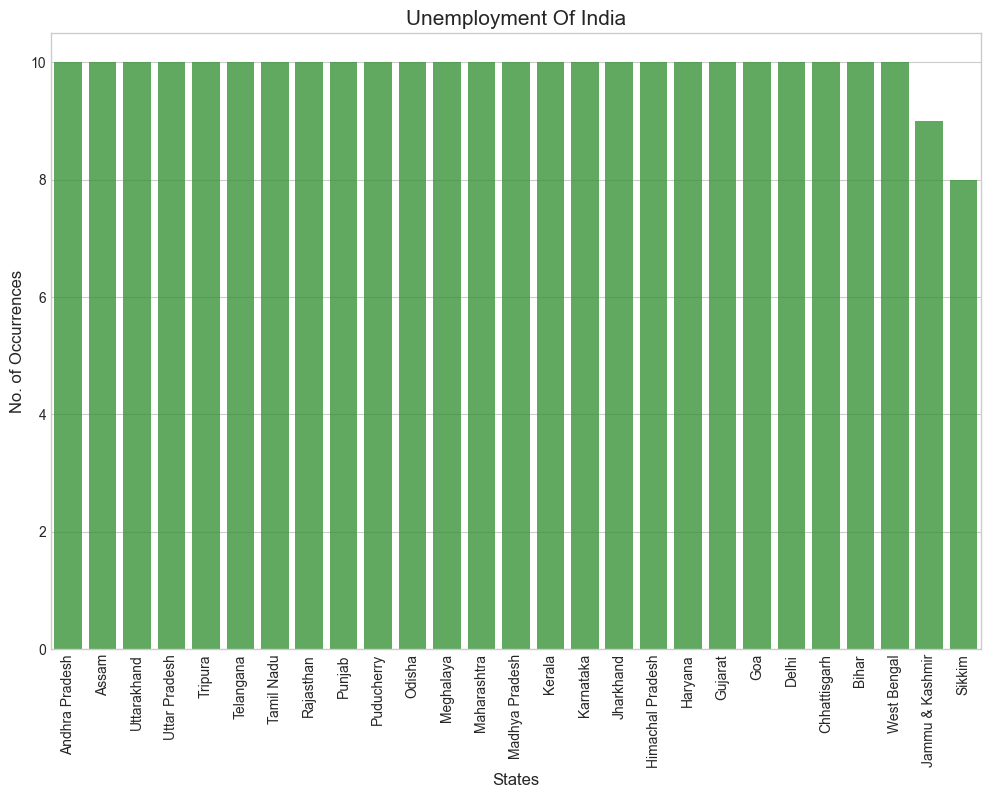

In [227]:
# State vs No. of Occurance

color = sns.color_palette()
cnt_srs = info.States.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Unemployment Of India', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

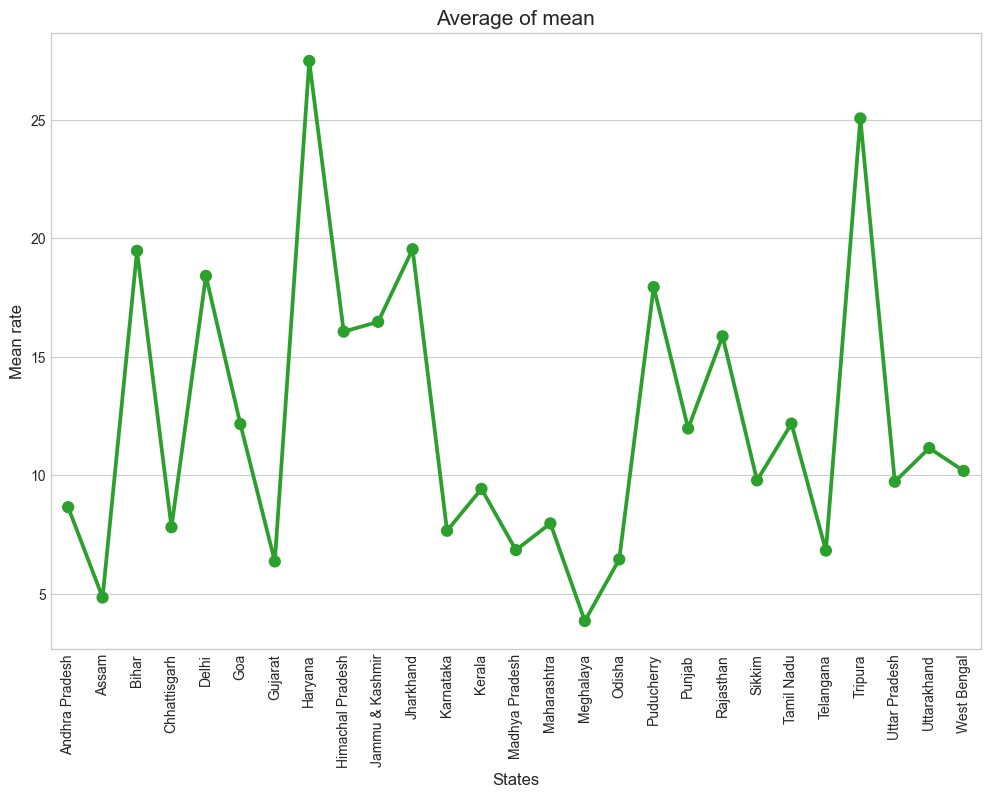

In [215]:
# State vs Mean Rate

grouped_df = info.groupby(["States"])["Estimated Unemployment Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = grouped_df['States'].values, y = grouped_df['Estimated Unemployment Rate'].values, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [216]:
info.States.nunique()

27

In [217]:
# Unemployment According to the States

make_total = info.pivot_table("Estimated Unemployment Rate", index=['States'], aggfunc='mean')
topstate = make_total.sort_values(by='Estimated Unemployment Rate', ascending=False)[:27]
print(topstate)

                  Estimated Unemployment Rate
States                                       
Haryana                             27.477000
Tripura                             25.055000
Jharkhand                           19.539000
Bihar                               19.471000
Delhi                               18.414000
Puducherry                          17.942000
Jammu & Kashmir                     16.477778
Himachal Pradesh                    16.065000
Rajasthan                           15.868000
Tamil Nadu                          12.187000
Goa                                 12.167000
Punjab                              11.981000
Uttarakhand                         11.156000
West Bengal                         10.192000
Sikkim                               9.792500
Uttar Pradesh                        9.737000
Kerala                               9.434000
Andhra Pradesh                       8.664000
Maharashtra                          7.979000
Chhattisgarh                      

In [226]:
# Unemployment according to the Region

make_total_2 = info.pivot_table("Estimated Unemployment Rate", index=['Region'], aggfunc='mean')
topstate_2 = make_total_2.sort_values(by='Estimated Unemployment Rate', ascending=False)[:27]
print(topstate_2)

           Estimated Unemployment Rate
Region                                
North                        15.889620
East                         13.916000
Northeast                    10.950263
South                        10.454667
West                          8.239000


In [222]:
# Unemployment according to the Date

make_total_1 = info.pivot_table("Estimated Unemployment Rate", index=['Date'], aggfunc='mean')
topstate_1 = make_total_1.sort_values(by='Estimated Unemployment Rate', ascending=False)[:27]
print(topstate_1)

             Estimated Unemployment Rate
Date                                    
 31-05-2020                    23.244444
 30-04-2020                    22.236154
 30-06-2020                    10.911111
 31-03-2020                    10.782593
 31-08-2020                    10.313333
 31-07-2020                     9.834444
 29-02-2020                     9.266154
 31-01-2020                     9.196538
 30-09-2020                     8.705926
 31-10-2020                     8.026296
